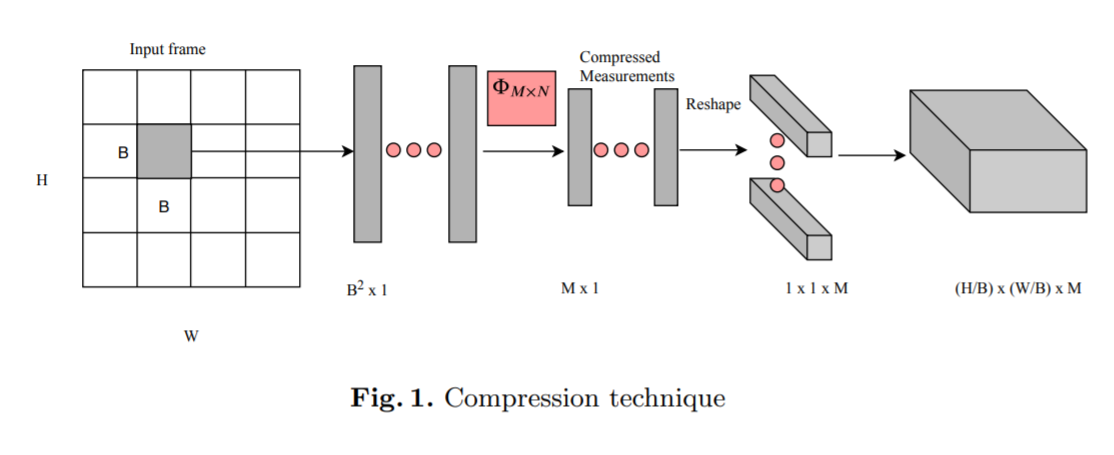

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# BCS

In [ ]:
def StoreFramesPerVideo(DIR, output_shape):
  images = []
  for data in os.listdir(DIR):
    if data == '.ipynb_checkpoints':
      continue
    filepath = os.path.join(DIR, data)
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, output_shape)
    images.append(img)
  return images 

In [ ]:
def BCS(images, T, H, W, B):
  # define array to store flattened blocks 
  patches = np.zeros((T, B**2,int((H/B)*(W/B))))
  #print(patches.shape)
  for t in range(T):
    k=0 #counter for total no of vectors
    for i in range(0,255,16):
      for j in range(0,255,16):
        #extract patches of shape BxB traversing row by row
        patch = images[t][i:i+B, j:j+B]
        patch = patch.reshape(B**2)
        patches[t,:,k] = patch
        k +=1
  return patches

In [ ]:
def getCSmeasurements(patches, phi, T, H, W, B, M):
  Y = np.zeros((T, int(H/B), int(W/B), M))
  for t in range(T):
    #compression
    y = np.dot(phi, patches[t])
    K = 0 #counter for vectors
    for i in range(0,16):
      for j in range(0,16):
        Y[t,i,j,:] = y[:,K]
        K +=1
  return Y

In [ ]:
images = StoreFramesPerVideo('/content/images', output_shape = (256,256))
H = images[0].shape[0]
W = images[0].shape[1]
B = 16 #block dimensions
T = len(images) #counter for no. of frames
patches = BCS(images, T, H, W, B)
M = 50 # M = B^2 x R where R is sampling rate (~0.2)
phi = np.random.randn(M,B**2)
Y = getCSmeasurements(patches, phi, T, H, W, B, M)